<a href="https://colab.research.google.com/github/omareessamm/Elevvo-Pathways-internship/blob/main/Student_Score_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
import pandas as pd

# Upload file
uploaded = files.upload()

# Check uploaded filenames
for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))

# Load dataset (replace filename if different)
df = pd.read_csv(next(iter(uploaded)))
df.head()


Saving archive (3).zip to archive (3).zip
User uploaded file "archive (3).zip" with length 96178 bytes


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [2]:
# Shape & column info
print(df.shape)
print(df.info())

# Summary statistics
df.describe()

# Missing values
df.isnull().sum()


(6607, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [5]:
df["Teacher_Quality"].fillna(df["Teacher_Quality"].mode()[0], inplace=True)
df["Parental_Education_Level"].fillna(df["Parental_Education_Level"].mode()[0], inplace=True)
df["Distance_from_Home"].fillna(df["Distance_from_Home"].mode()[0], inplace=True)

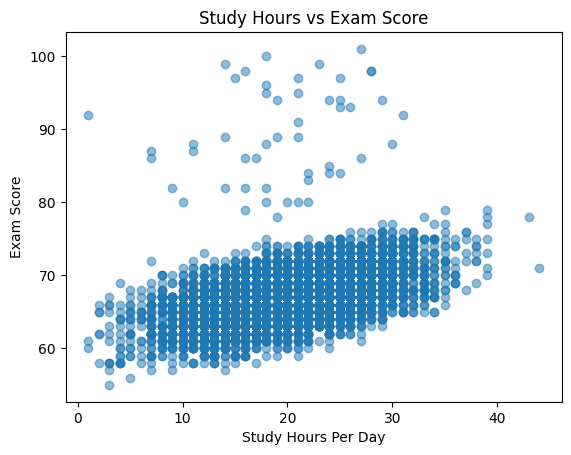

In [7]:
import matplotlib.pyplot as plt

plt.scatter(df['Hours_Studied'], df['Exam_Score'], alpha=0.5)
plt.xlabel("Study Hours Per Day")
plt.ylabel("Exam Score")
plt.title("Study Hours vs Exam Score")
plt.show()

Correlation with Exam_Score:
 Exam_Score           1.000000
Attendance           0.581072
Hours_Studied        0.445455
Previous_Scores      0.175079
Tutoring_Sessions    0.156525
Physical_Activity    0.027824
Sleep_Hours         -0.017022
Name: Exam_Score, dtype: float64


/tmp/ipython-input-1893785375.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_target.values, y=corr_target.index, palette="viridis")


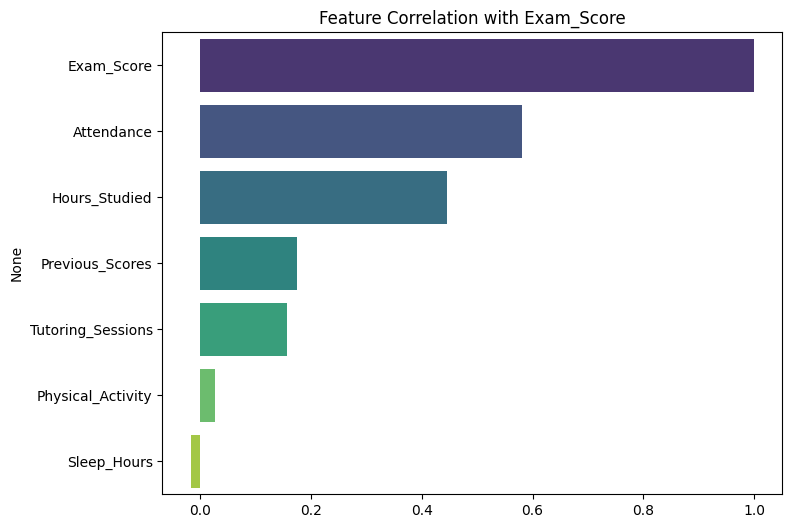

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is already loaded
# Get correlation matrix with Exam_Score
corr = df.corr(numeric_only=True)

# Sort features by correlation with Exam_Score
corr_target = corr["Exam_Score"].sort_values(ascending=False)
print("Correlation with Exam_Score:\n", corr_target)

# Optional: visualize
plt.figure(figsize=(8,6))
sns.barplot(x=corr_target.values, y=corr_target.index, palette="viridis")
plt.title("Feature Correlation with Exam_Score")
plt.show()


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Use only Hours_Studied
X = df[["Hours_Studied"]]
y = df["Exam_Score"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)


Mean Squared Error: 10.85592128879332
R² Score: 0.2319868674542106


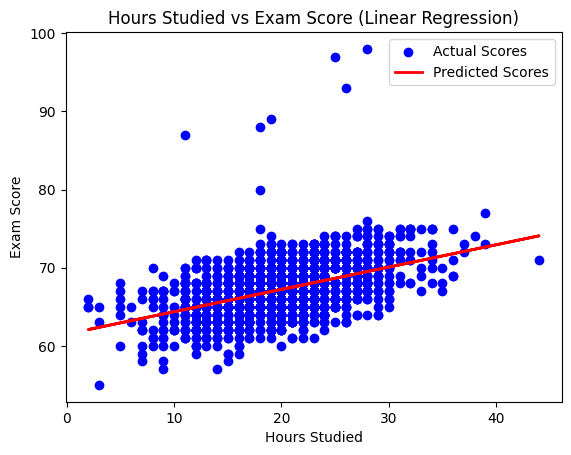

Mean Squared Error: 10.85592128879332
R² Score: 0.2319868674542106


In [14]:
import matplotlib.pyplot as plt

# Scatter plot of actual data
plt.scatter(X_test, y_test, color="blue", label="Actual Scores")

# Regression line
plt.plot(X_test, y_pred, color="red", linewidth=2, label="Predicted Scores")

plt.xlabel("Hours Studied")
plt.ylabel("Exam Score")
plt.title("Hours Studied vs Exam Score (Linear Regression)")
plt.legend()
plt.show()

# Print evaluation metrics
print("Mean Squared Error:", mse)
print("R² Score:", r2)
